In [6]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install tweepy 


     |████████████████████████████████| 94 kB 5.2 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install wordcloud

     |████████████████████████████████| 366 kB 22.1 MB/s eta 0:00:01    |███▋                            | 40 kB 28.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import tweepy
import matplotlib.pyplot as plt

In [11]:
#conection
bearer_token = '<SEU BEARER TOKEN>client = tweepy.Client(bearer_token)

In [19]:
#buscando os dados

response = client.search_recent_tweets("agua qualidade sabesp", max_results=100)

In [20]:
#trazendo os dados
tweets = response.data

for tweet in tweets:
    print(tweet.text)

@nate_iskm água da sabesp é água de qualidade
Continuamos trabalhando no Pinheiros e no Tietê, este com um prazo de conclusão maior. E temos certeza de que estamos avançando tanto em termos de oferecer serviço de saneamento à população, quanto na melhoria da qualidade da água dos rios e preservação do meio ambiente @sabesp
@Eduardo66445312 @sabesp Graças a Deus ligaram a minha água ontem as 18:05, mas é isso mesmo somos um lixo, pagamos caro pelo serviço, o serviço é de péssima qualidade, e pior não podemos nem trocar de fornecedor, pq só tem esse  por isso q é esse lixo. Não tem concorrência.


In [24]:

tweets_list =[[tweet.text]for tweet in tweets]
df = pd.DataFrame(tweets_list, columns=['Texto'])
pd.options.display.max_colwidth =180
df.head()

,Texto
0,@nate_iskm água da sabesp é água de qualidade
1,"Continuamos trabalhando no Pinheiros e no Tietê, este com um prazo de conclusão maior. E temos certeza de que estamos avançando tanto em termos de oferecer serviço de saneament..."
2,"@Eduardo66445312 @sabesp Graças a Deus ligaram a minha água ontem as 18:05, mas é isso mesmo somos um lixo, pagamos caro pelo serviço, o serviço é de péssima qualidade, e pior ..."


In [26]:
#agrupando
string = pd.Series(df['Texto'].values).str.cat(sep='')
string

'@nate_iskm água da sabesp é água de qualidadeContinuamos trabalhando no Pinheiros e no Tietê, este com um prazo de conclusão maior. E temos certeza de que estamos avançando tanto em termos de oferecer serviço de saneamento à população, quanto na melhoria da qualidade da água dos rios e preservação do meio ambiente @sabesp@Eduardo66445312 @sabesp Graças a Deus ligaram a minha água ontem as 18:05, mas é isso mesmo somos um lixo, pagamos caro pelo serviço, o serviço é de péssima qualidade, e pior não podemos nem trocar de fornecedor, pq só tem esse  por isso q é esse lixo. Não tem concorrência.'

In [28]:
#Limpando
caracteres = "#@"

for i in range(len(caracteres)):
    string = string.replace(caracteres[i],"")
string

'nate_iskm água da sabesp é água de qualidadeContinuamos trabalhando no Pinheiros e no Tietê, este com um prazo de conclusão maior. E temos certeza de que estamos avançando tanto em termos de oferecer serviço de saneamento à população, quanto na melhoria da qualidade da água dos rios e preservação do meio ambiente sabespEduardo66445312 sabesp Graças a Deus ligaram a minha água ontem as 18:05, mas é isso mesmo somos um lixo, pagamos caro pelo serviço, o serviço é de péssima qualidade, e pior não podemos nem trocar de fornecedor, pq só tem esse  por isso q é esse lixo. Não tem concorrência.'

In [44]:
#Ignorando palavras

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.update(["com","RT","de","da","esse","essa","esta","é","e","para","dar","pois","em","um","uma","que","qual","tem","temos","nós","este"])

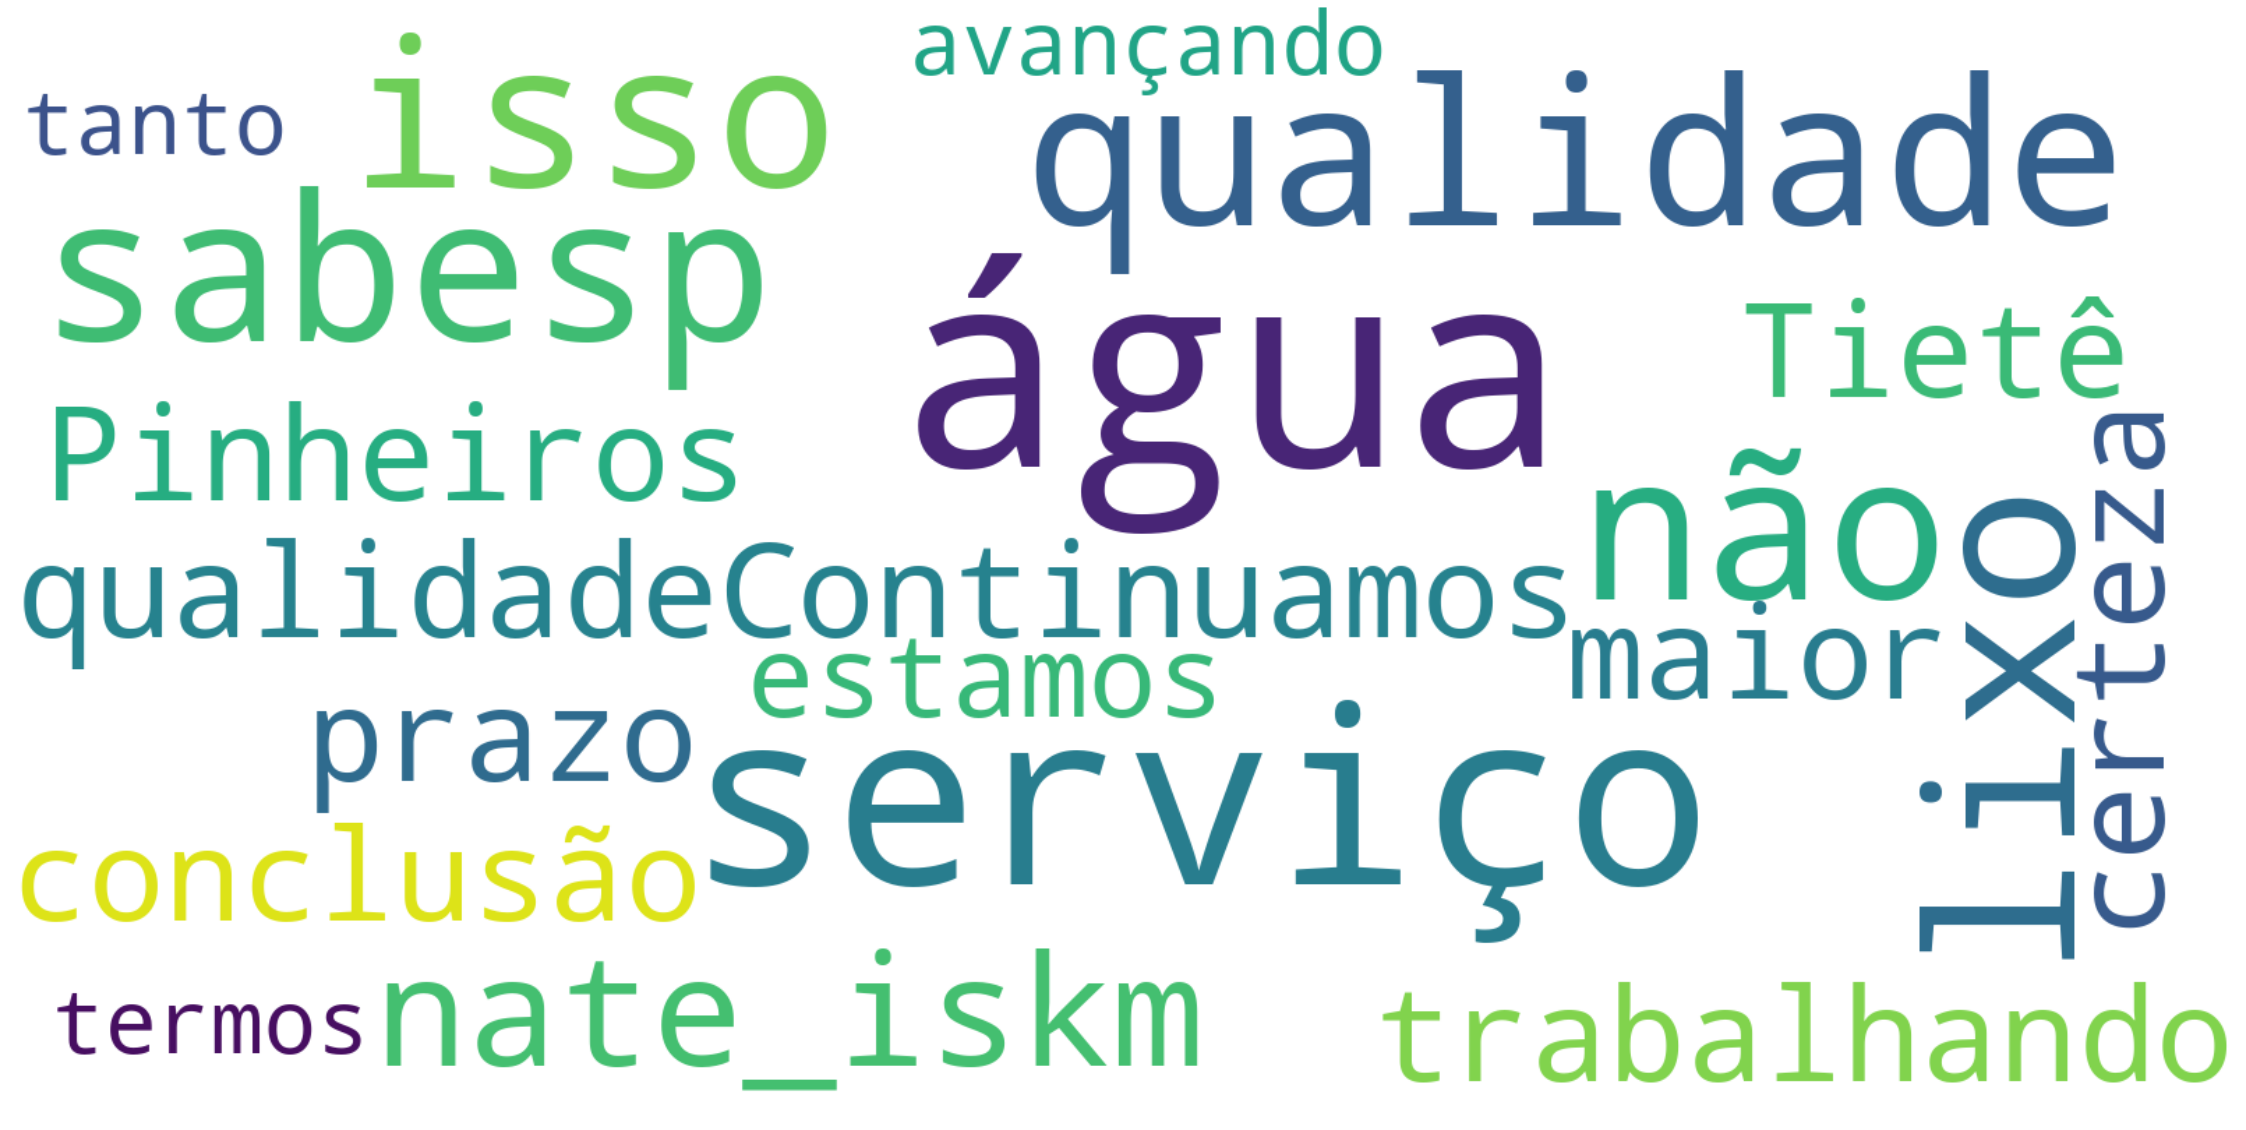

In [45]:
#Word Cloud

wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=20,collocations=False,background_color='white').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()